## Import Data


In [81]:
# from google.colab import drive
# drive.mount('/content/drive')

In [82]:
import pandas as pd
data = pd.read_csv('airquality (1).csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


In [83]:
# data = data.drop(columns = ['Timestamp','deviceId','payload_id'])
# data

In [84]:
data.isnull().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [85]:
data.isna().sum()

PM2.5    0
co2      0
no2      0
so2      0
o3       0
dtype: int64

In [86]:
data.duplicated().sum()

0

In [87]:
data = data.drop_duplicates()
data.duplicated().sum()

0

In [88]:
data.describe(

)

,PM2.5,co2,no2,so2,o3
count,5999.000000,5999.000000,5999.000000,5999.000000,5999.000000
mean,20.614936,2330.332889,100.995833,132.494916,124.645774
std,11.985017,2092.686367,89.962540,120.542128,59.050665
min,3.000000,40.000000,5.000000,1.000000,10.000000
25%,11.000000,624.500000,27.000000,35.000000,77.000000
50%,18.000000,1183.000000,48.000000,59.000000,123.000000
75%,28.000000,4092.500000,174.000000,229.000000,167.000000
max,48.000000,6999.000000,300.000000,400.000000,250.000000


In [89]:
## cek data Oulier

Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_indices = data[(data < lower_bound) | (data > upper_bound)].dropna(how='all').index
print(f"Number of potential outliers detected: {len(outlier_indices)}")

Number of potential outliers detected: 0


In [90]:
## Hapus data Oulier
data_cleaned_looped = data.copy() # Create a copy to avoid modifying the original data

while True:
    Q1 = data_cleaned_looped.quantile(0.25)
    Q3 = data_cleaned_looped.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_indices = data_cleaned_looped[(data_cleaned_looped < lower_bound) | (data_cleaned_looped > upper_bound)].dropna(how='all').index

    if len(outlier_indices) == 0:
        print("No more outliers detected.")
        break
    else:
        print(f"Removing {len(outlier_indices)} potential outliers.")
        data_cleaned_looped = data_cleaned_looped.drop(outlier_indices)

print(f"Number of rows after removing outliers iteratively: {len(data_cleaned_looped)}")
display(data_cleaned_looped.head())

No more outliers detected.
Number of rows after removing outliers iteratively: 5999


,PM2.5,co2,no2,so2,o3
0,25,40,40,40,180
1,26,6286,145,201,157
2,36,1970,152,336,76
3,47,6837,150,382,210
4,40,3979,39,373,84


In [91]:
data_cleaned_looped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   PM2.5   5999 non-null   int64
 1   co2     5999 non-null   int64
 2   no2     5999 non-null   int64
 3   so2     5999 non-null   int64
 4   o3      5999 non-null   int64
dtypes: int64(5)
memory usage: 234.5 KB


In [92]:
# from sklearn.preprocessing import StandardScaler

# # Dataframe kamu: data_cleaned
# features = ["PM2.5 (ug/m3)", "PM10 (ug/m3)", "CO2 (ppm)", "Temperature (Celsius)", "Temperature (Fahrenheit)", "Humidity (%)"]


<Axes: >

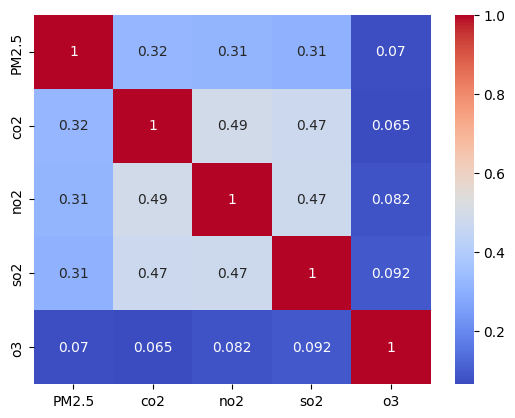

In [93]:
## Heatmap Data
import seaborn as sns
sns.heatmap(data_cleaned_looped.corr(), annot=True, cmap='coolwarm')

# Prepocessing

In [94]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X = data_cleaned_looped.copy()

# Split sebelum apa pun!
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42, stratify=None)

In [95]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_test)         # HANYA TRANSFORM, TIDAK FIT

Clustering progress:  11%|█         | 1/9 [00:00<00:02,  2.85it/s]

k=2, Silhouette Score=0.3634


Clustering progress:  22%|██▏       | 2/9 [00:00<00:02,  2.50it/s]

k=3, Silhouette Score=0.3640


Clustering progress:  33%|███▎      | 3/9 [00:01<00:03,  1.86it/s]

k=4, Silhouette Score=0.3584


Clustering progress:  44%|████▍     | 4/9 [00:02<00:02,  1.83it/s]

k=5, Silhouette Score=0.3542


Clustering progress:  56%|█████▌    | 5/9 [00:03<00:02,  1.42it/s]

k=6, Silhouette Score=0.2259


Clustering progress:  67%|██████▋   | 6/9 [00:04<00:02,  1.14it/s]

k=7, Silhouette Score=0.2304


Clustering progress:  78%|███████▊  | 7/9 [00:05<00:01,  1.18it/s]

k=8, Silhouette Score=0.2340


Clustering progress:  89%|████████▉ | 8/9 [00:05<00:00,  1.17it/s]

k=9, Silhouette Score=0.2374


Clustering progress: 100%|██████████| 9/9 [00:06<00:00,  1.36it/s]

k=10, Silhouette Score=0.2411


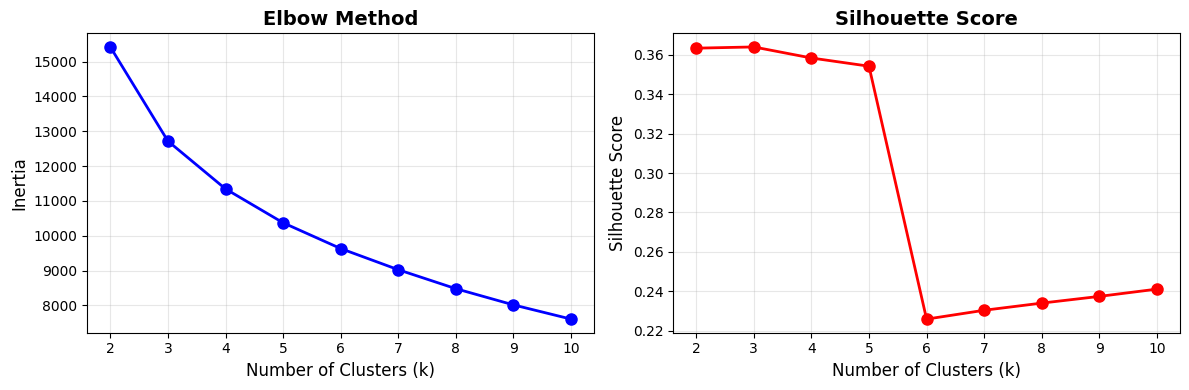

In [96]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
sil_scores = []
K_range = range(2, 11)

# Loop untuk setiap nilai k
for k in tqdm(K_range, desc="Clustering progress"):
    # Latih K-Means pada data yang sudah di-scale
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_train_scaled)
    
    # Simpan inertia
    inertias.append(kmeans_temp.inertia_)
    
    # Hitung Silhouette Score pada data yang SAMA (X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, labels_temp)
    sil_scores.append(sil_score)
    
    # Print hasil untuk setiap k
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

# Plot hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Plot Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [97]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=2, n_init=10, random_state=42)

In [98]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

             PM2.5          co2         no2         so2          o3
Cluster                                                            
0        26.559091  3813.315702  164.431818  215.442562  132.302893
1        14.617066   799.144178   36.526272   46.706179  116.634300


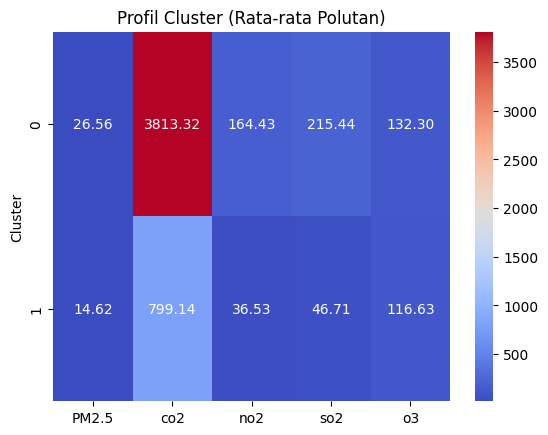

In [99]:
# Tambahkan ke dataframe
X_train["Cluster"] = train_clusters
X_test["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_train.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

In [100]:
# === 1. Jumlah data per cluster ===
print("Jumlah data per cluster:")
print(pd.Series(train_clusters).value_counts())

Jumlah data per cluster:
0    2420
1    2379
Name: count, dtype: int64


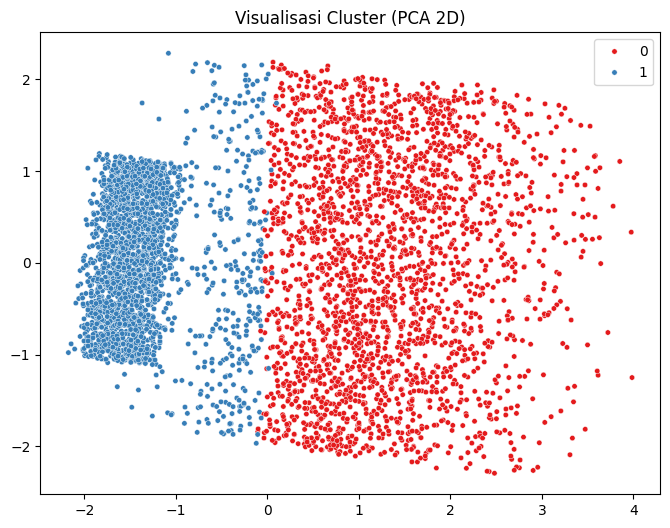

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [102]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.36337446966204245
Davies-Bouldin Index: 1.196774919605624


In [103]:
X_train = X_train.rename(columns={
    "co2": "CO",
    "no2": "NO2",
    "so2": "SO2",
    "o3": "O3"
})


In [104]:
import numpy as np
import pandas as pd

# --- Breakpoints AQI ---
# format: pollutant: [(Bmin, Bmax, Imin, Imax)]
aqi_breakpoints = {
    "PM2.5": [(0, 30, 0, 50), (31, 60, 51, 100), (61, 90, 101, 200), 
              (91, 120, 201, 300), (121, 250, 301, 400)],
    "NO2":   [(0, 40, 0, 50), (41, 80, 51, 100), (81, 180, 101, 200), 
              (181, 280, 201, 300), (281, 400, 301, 400)],
    "O3":    [(0, 50, 0, 50), (51, 100, 51, 100), (101, 168, 101, 200), 
              (169, 208, 201, 300), (209, 748, 301, 400)],
    "SO2":   [(0, 40, 0, 50), (41, 80, 51, 100), (81, 380, 101, 200), 
              (381, 800, 201, 300), (801, 1600, 301, 400)],
    "CO":    [(0, 1, 0, 50), (1.1, 2, 51, 100), (2.1, 10, 101, 200), 
              (10.1, 17, 201, 300), (17.1, 34, 301, 400)],
}

# --- Fungsi hitung sub-index ---
def calculate_subindex(pollutant, value):
    if pollutant not in aqi_breakpoints:
        return np.nan
    for Bmin, Bmax, Imin, Imax in aqi_breakpoints[pollutant]:
        if Bmin <= value <= Bmax:
            return ((Imax - Imin) / (Bmax - Bmin)) * (value - Bmin) + Imin
    return np.nan  # jika diluar range

# --- Fungsi hitung AQI per baris ---
def calculate_aqi(row):
    sub_indices = {}
    for pollutant in ["PM2.5", "NO2", "O3", "SO2", "CO"]:
        sub_indices[pollutant] = calculate_subindex(pollutant, row[pollutant])
    # Ambil sub-index tertinggi
    max_pollutant = max(sub_indices, key=sub_indices.get)
    max_value = sub_indices[max_pollutant]
    return max_value, max_pollutant

# --- Mapping kategori AQI ---
def categorize_aqi(value):
    if value <= 50: return "Good"
    elif value <= 100: return "Satisfactory"
    elif value <= 200: return "Moderate"
    elif value <= 300: return "Poor"
    elif value <= 400: return "Very Poor"
    else: return "Severe"

# --- Tambahkan ke DataFrame ---
# --- Tambahkan ke DataFrame ---
X_train["AQI_Value"], X_train["Dominant_Pollutant"] = zip(*X_train.apply(calculate_aqi, axis=1))
X_train["AQI_Category"] = X_train["AQI_Value"].apply(categorize_aqi)


AQI_Category  Good  Moderate  Poor  Satisfactory  Very Poor
Cluster                                                    
0                0       760  1062            17        581
1               10      1292   259           769         49


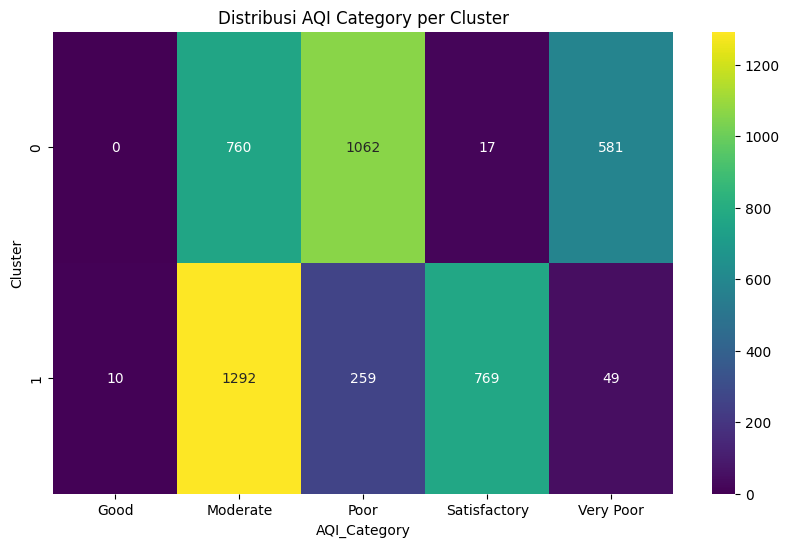

In [105]:
# Crosstab cluster vs AQI
crosstab = pd.crosstab(X_train["Cluster"], X_train["AQI_Category"])
print(crosstab)

plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, cmap="viridis", fmt="d")
plt.title("Distribusi AQI Category per Cluster")
plt.show()

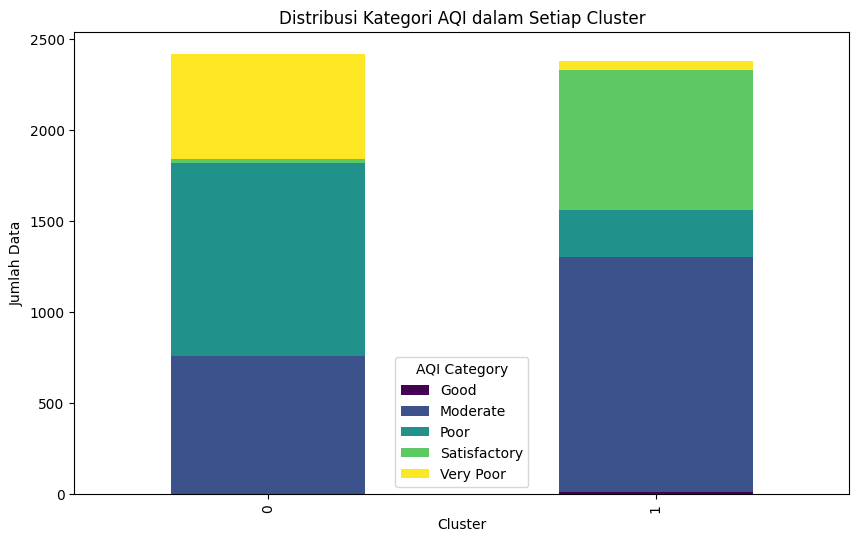

In [106]:
# Plot distribusi
crosstab.plot(kind="bar", stacked=True, figsize=(10,6), colormap="viridis")
plt.title("Distribusi Kategori AQI dalam Setiap Cluster")
plt.xlabel("Cluster"); plt.ylabel("Jumlah Data")
plt.legend(title="AQI Category")
plt.show()

AQI_Category  Good  Moderate  Poor  Satisfactory  Very Poor
Cluster                                                    
0                0       760  1062            17        581
1               10      1292   259           769         49


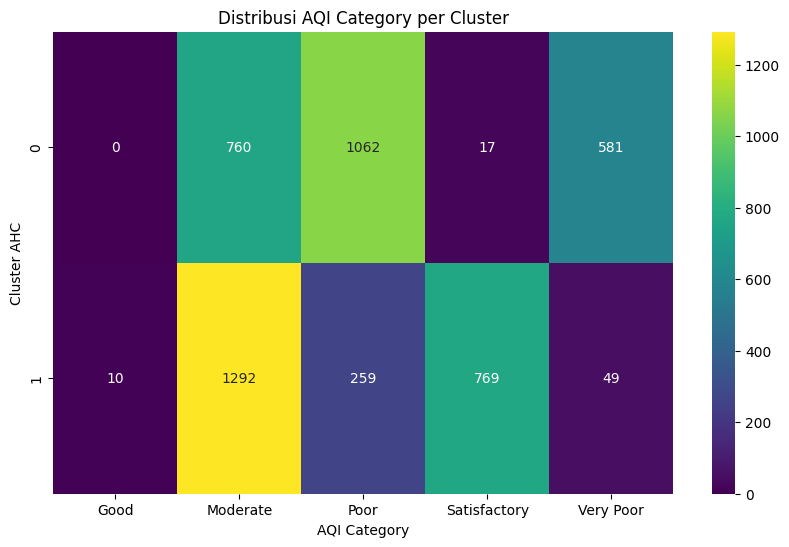

Adjusted Rand Index (ARI): 0.1540


In [107]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crosstab cluster vs AQI
crosstab = pd.crosstab(X_train["Cluster"], X_train["AQI_Category"])
print(crosstab)

# Heatmap visualisasi
plt.figure(figsize=(10,6))
sns.heatmap(crosstab, annot=True, cmap="viridis", fmt="d")
plt.title("Distribusi AQI Category per Cluster")
plt.xlabel("AQI Category")
plt.ylabel("Cluster AHC")
plt.show()

# --- Evaluasi ARI Score ---
from sklearn.metrics import adjusted_rand_score

ari = adjusted_rand_score(X_train["AQI_Category"], X_train["Cluster"])
print(f"Adjusted Rand Index (ARI): {ari:.4f}")


# Tambahan

In [108]:
crosstab

AQI_Category,Good,Moderate,Poor,Satisfactory,Very Poor
Cluster,,,,,
0,0,760,1062,17,581
1,10,1292,259,769,49


   Poor  Moderate
0  1062         0
1     0      1292


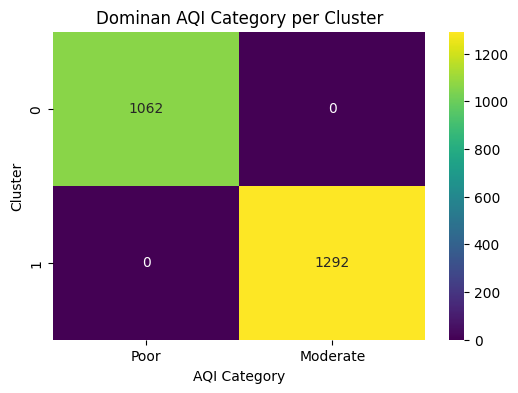

In [109]:
# Cari kategori dominan per cluster
dominant = crosstab.idxmax(axis=1)

# Buat salinan crosstab baru hanya dengan kategori dominan
filtered_crosstab = pd.DataFrame()

for cluster, cat in dominant.items():
    filtered_crosstab.loc[cluster, cat] = crosstab.loc[cluster, cat]

filtered_crosstab = filtered_crosstab.fillna(0).astype(int)

print(filtered_crosstab)

# Visualisasi heatmap hanya kategori dominan
plt.figure(figsize=(6,4))
sns.heatmap(filtered_crosstab, annot=True, cmap="viridis", fmt="d")
plt.title("Dominan AQI Category per Cluster")
plt.xlabel("AQI Category")
plt.ylabel("Cluster")
plt.show()


In [110]:
X_train

,PM2.5,CO,NO2,SO2,O3,Cluster,AQI_Value,Dominant_Pollutant,AQI_Category
5627,14,489,29,42,144,1,164.537313,O3,Moderate
1755,31,6440,148,125,246,0,307.795918,O3,Very Poor
2344,20,766,272,115,218,0,302.653061,O3,Very Poor
4283,20,717,34,51,92,1,92.000000,O3,Satisfactory
3034,40,797,5,162,248,0,308.163265,O3,Very Poor
...,...,...,...,...,...,...,...,...,...
3772,10,607,13,28,136,1,152.716418,O3,Moderate
5191,22,723,12,27,177,1,221.307692,O3,Poor
5226,17,679,31,38,93,1,93.000000,O3,Satisfactory
5390,5,210,45,33,142,1,161.582090,O3,Moderate


In [111]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4799 entries, 5627 to 860
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   PM2.5               4799 non-null   int64  
 1   CO                  4799 non-null   int64  
 2   NO2                 4799 non-null   int64  
 3   SO2                 4799 non-null   int64  
 4   O3                  4799 non-null   int64  
 5   Cluster             4799 non-null   int32  
 6   AQI_Value           4799 non-null   float64
 7   Dominant_Pollutant  4799 non-null   object 
 8   AQI_Category        4799 non-null   object 
dtypes: float64(1), int32(1), int64(5), object(2)
memory usage: 356.2+ KB


In [112]:
pd.DataFrame(X_train)

,PM2.5,CO,NO2,SO2,O3,Cluster,AQI_Value,Dominant_Pollutant,AQI_Category
5627,14,489,29,42,144,1,164.537313,O3,Moderate
1755,31,6440,148,125,246,0,307.795918,O3,Very Poor
2344,20,766,272,115,218,0,302.653061,O3,Very Poor
4283,20,717,34,51,92,1,92.000000,O3,Satisfactory
3034,40,797,5,162,248,0,308.163265,O3,Very Poor
...,...,...,...,...,...,...,...,...,...
3772,10,607,13,28,136,1,152.716418,O3,Moderate
5191,22,723,12,27,177,1,221.307692,O3,Poor
5226,17,679,31,38,93,1,93.000000,O3,Satisfactory
5390,5,210,45,33,142,1,161.582090,O3,Moderate


# Cek cluster lagi

In [113]:
X_train

,PM2.5,CO,NO2,SO2,O3,Cluster,AQI_Value,Dominant_Pollutant,AQI_Category
5627,14,489,29,42,144,1,164.537313,O3,Moderate
1755,31,6440,148,125,246,0,307.795918,O3,Very Poor
2344,20,766,272,115,218,0,302.653061,O3,Very Poor
4283,20,717,34,51,92,1,92.000000,O3,Satisfactory
3034,40,797,5,162,248,0,308.163265,O3,Very Poor
...,...,...,...,...,...,...,...,...,...
3772,10,607,13,28,136,1,152.716418,O3,Moderate
5191,22,723,12,27,177,1,221.307692,O3,Poor
5226,17,679,31,38,93,1,93.000000,O3,Satisfactory
5390,5,210,45,33,142,1,161.582090,O3,Moderate


Sisa data setelah filter: 2354
Cluster  AQI_Category
1        Moderate        1292
0        Poor            1062
Name: count, dtype: int64
AQI_Category  Moderate  Poor
Cluster                     
0                    0  1062
1                 1292     0


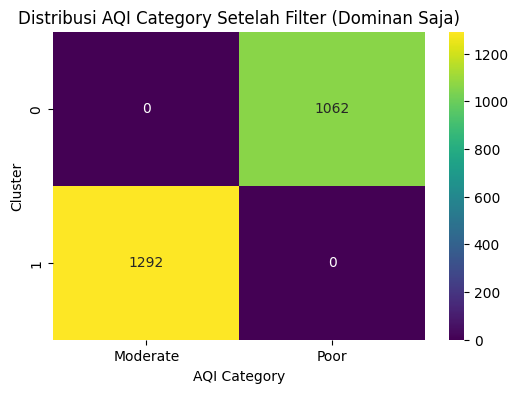

In [114]:
# Mapping cluster -> label dominan
dominant_map = {0: "Poor", 1: "Moderate"}

# Filter hanya data yang AQI_Category sesuai dengan dominan cluster
filtered_df = X_train[X_train.apply(lambda row: row["AQI_Category"] == dominant_map[row["Cluster"]], axis=1)]

print(f"Sisa data setelah filter: {len(filtered_df)}")
print(filtered_df[["Cluster", "AQI_Category"]].value_counts())

# Crosstab ulang
crosstab_filtered = pd.crosstab(filtered_df["Cluster"], filtered_df["AQI_Category"])
print(crosstab_filtered)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(crosstab_filtered, annot=True, cmap="viridis", fmt="d")
plt.title("Distribusi AQI Category Setelah Filter (Dominan Saja)")
plt.xlabel("AQI Category")
plt.ylabel("Cluster")
plt.show()

In [115]:
data_new = filtered_df.copy()
data_new

,PM2.5,CO,NO2,SO2,O3,Cluster,AQI_Value,Dominant_Pollutant,AQI_Category
5627,14,489,29,42,144,1,164.537313,O3,Moderate
5965,23,892,17,29,114,1,120.208955,O3,Moderate
3429,9,4377,73,385,113,0,201.945107,SO2,Poor
1483,19,4590,267,375,31,0,287.000000,NO2,Poor
438,14,5537,182,67,73,0,202.000000,NO2,Poor
...,...,...,...,...,...,...,...,...,...
466,36,1274,205,286,151,0,225.000000,NO2,Poor
5734,9,811,36,27,135,1,151.238806,O3,Moderate
3092,6,1963,9,375,186,0,244.153846,O3,Poor
3772,10,607,13,28,136,1,152.716418,O3,Moderate


In [117]:
data_new = data_new.drop(columns=['AQI_Category','Dominant_Pollutant','Cluster'])
data_new

,PM2.5,CO,NO2,SO2,O3,AQI_Value
5627,14,489,29,42,144,164.537313
5965,23,892,17,29,114,120.208955
3429,9,4377,73,385,113,201.945107
1483,19,4590,267,375,31,287.000000
438,14,5537,182,67,73,202.000000
...,...,...,...,...,...,...
466,36,1274,205,286,151,225.000000
5734,9,811,36,27,135,151.238806
3092,6,1963,9,375,186,244.153846
3772,10,607,13,28,136,152.716418


In [118]:
from sklearn.model_selection import train_test_split

# Asumsikan data_cleaned_looped adalah data numerik yang sudah dibersihkan
X1 = data_new.copy()

# Split sebelum apa pun!
X_traincls, X_testcls = train_test_split(X1, test_size=0.2, random_state=42, stratify=None)

In [119]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_traincls)   # FIT HANYA DI SINI
X_test_scaled = scaler.transform(X_testcls)         # HANYA TRANSFORM, TIDAK FIT

Clustering progress:  11%|█         | 1/9 [00:00<00:02,  3.34it/s]

k=2, Silhouette Score=0.4433


Clustering progress:  22%|██▏       | 2/9 [00:00<00:02,  3.02it/s]

k=3, Silhouette Score=0.4318


Clustering progress:  33%|███▎      | 3/9 [00:01<00:02,  2.84it/s]

k=4, Silhouette Score=0.4117


Clustering progress:  44%|████▍     | 4/9 [00:01<00:01,  3.08it/s]

k=5, Silhouette Score=0.2482


Clustering progress:  56%|█████▌    | 5/9 [00:01<00:01,  3.35it/s]

k=6, Silhouette Score=0.2480


Clustering progress:  67%|██████▋   | 6/9 [00:02<00:01,  2.38it/s]

k=7, Silhouette Score=0.2500


Clustering progress:  78%|███████▊  | 7/9 [00:02<00:00,  2.25it/s]

k=8, Silhouette Score=0.2482


Clustering progress:  89%|████████▉ | 8/9 [00:03<00:00,  2.34it/s]

k=9, Silhouette Score=0.2528


Clustering progress: 100%|██████████| 9/9 [00:03<00:00,  2.56it/s]

k=10, Silhouette Score=0.2547


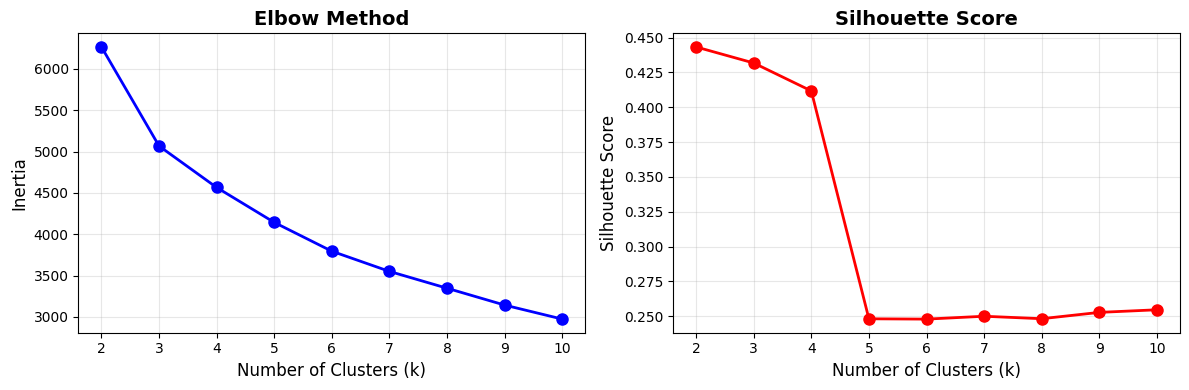

In [120]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from tqdm import tqdm

inertias = []
sil_scores = []
K_range = range(2, 11)

# Loop untuk setiap nilai k
for k in tqdm(K_range, desc="Clustering progress"):
    # Latih K-Means pada data yang sudah di-scale
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_temp = kmeans_temp.fit_predict(X_train_scaled)
    
    # Simpan inertia
    inertias.append(kmeans_temp.inertia_)
    
    # Hitung Silhouette Score pada data yang SAMA (X_train_scaled)
    sil_score = silhouette_score(X_train_scaled, labels_temp)
    sil_scores.append(sil_score)
    
    # Print hasil untuk setiap k
    print(f"k={k}, Silhouette Score={sil_score:.4f}")

# Plot hasil
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot Elbow Method
ax[0].plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
ax[0].set_title('Elbow Method', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[0].set_ylabel('Inertia', fontsize=12)
ax[0].grid(True, alpha=0.3)

# Plot Silhouette Score
ax[1].plot(K_range, sil_scores, 'ro-', linewidth=2, markersize=8)
ax[1].set_title('Silhouette Score', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Number of Clusters (k)', fontsize=12)
ax[1].set_ylabel('Silhouette Score', fontsize=12)
ax[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [121]:
# === 5. Pilih jumlah cluster, misal k=3 ===
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans.fit(X_train_scaled) # HANYA FIT PADA TRAIN

KMeans(n_clusters=2, n_init=10, random_state=42)

In [124]:
# Assign cluster ke Train & Test
train_clusters = kmeans.predict(X_train_scaled)
test_clusters = kmeans.predict(X_test_scaled)   # HANYA PREDICT, TIDAK FIT

             PM2.5           CO         NO2         SO2          O3  \
Cluster                                                               
0        14.685328   827.218147   36.916023   50.503861  127.734556   
1        25.577332  3727.340024  193.077922  218.662338  127.438017   

          AQI_Value  
Cluster              
0        151.203320  
1        250.568909  


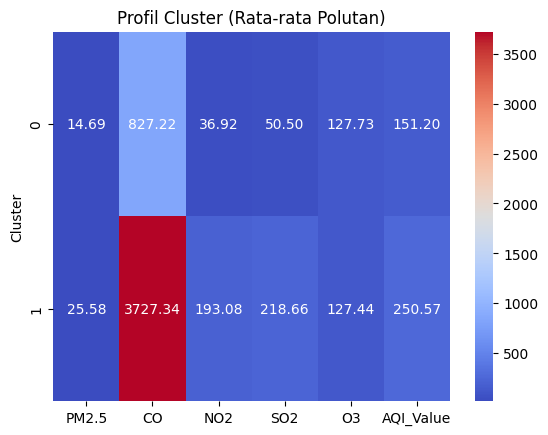

In [134]:
# Tambahkan ke dataframe
X_traincls["Cluster"] = train_clusters
X_testcls["Cluster"] = test_clusters

# === 6. Profil cluster ===
cluster_profile = X_traincls.groupby("Cluster").mean()
print(cluster_profile)

sns.heatmap(cluster_profile, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Profil Cluster (Rata-rata Polutan)")
plt.show()

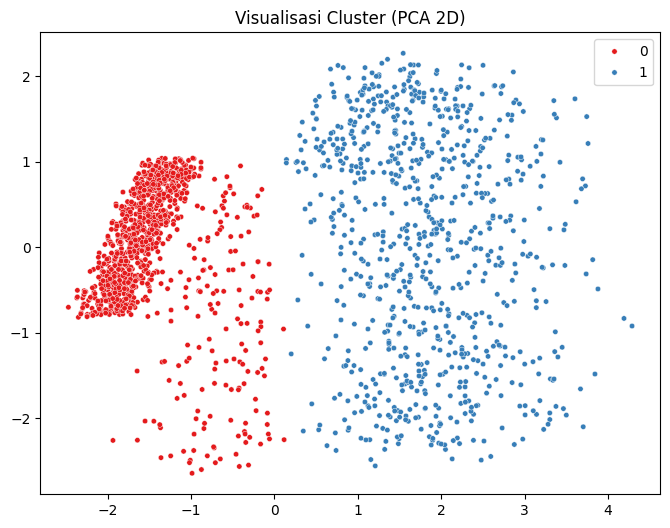

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
# === 2. Scatterplot cluster (PCA 2D) ===
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=train_clusters, palette="Set1", s=15)
plt.title("Visualisasi Cluster (PCA 2D)")
plt.show()

In [136]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Evaluate clustering performance
# Silhouette Score: Higher value means better defined clusters (range -1 to 1)
silhouette_avg = silhouette_score(X_train_scaled, train_clusters)
print(f"Silhouette Score: {silhouette_avg}")

# Davies-Bouldin Index: Lower value means better clustering (0 indicates perfect separation)
db_index = davies_bouldin_score(X_train_scaled, train_clusters)
print(f"Davies-Bouldin Index: {db_index}")

Silhouette Score: 0.4433034066243009
Davies-Bouldin Index: 1.0269384906735783


# Klasifikasi

In [137]:
X_train = X_train.drop(columns=['AQI_Value','Dominant_Pollutant'])
X_train

,PM2.5,CO,NO2,SO2,O3,Cluster,AQI_Category
5627,14,489,29,42,144,1,Moderate
1755,31,6440,148,125,246,0,Very Poor
2344,20,766,272,115,218,0,Very Poor
4283,20,717,34,51,92,1,Satisfactory
3034,40,797,5,162,248,0,Very Poor
...,...,...,...,...,...,...,...
3772,10,607,13,28,136,1,Moderate
5191,22,723,12,27,177,1,Poor
5226,17,679,31,38,93,1,Satisfactory
5390,5,210,45,33,142,1,Moderate


Sisa data setelah filter: 2354
Cluster  AQI_Category
1        Moderate        1292
0        Poor            1062
Name: count, dtype: int64
AQI_Category  Moderate  Poor
Cluster                     
0                    0  1062
1                 1292     0


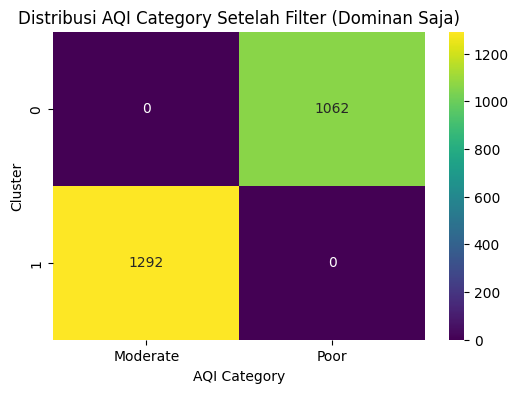

In [138]:
# Mapping cluster -> label dominan
dominant_map = {0: "Poor", 1: "Moderate"}

# Filter hanya data yang AQI_Category sesuai dengan dominan cluster
filtered_df = X_train[X_train.apply(lambda row: row["AQI_Category"] == dominant_map[row["Cluster"]], axis=1)]

print(f"Sisa data setelah filter: {len(filtered_df)}")
print(filtered_df[["Cluster", "AQI_Category"]].value_counts())

# Crosstab ulang
crosstab_filtered = pd.crosstab(filtered_df["Cluster"], filtered_df["AQI_Category"])
print(crosstab_filtered)

# Visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(crosstab_filtered, annot=True, cmap="viridis", fmt="d")
plt.title("Distribusi AQI Category Setelah Filter (Dominan Saja)")
plt.xlabel("AQI Category")
plt.ylabel("Cluster")
plt.show()


In [139]:
filtered_df

,PM2.5,CO,NO2,SO2,O3,Cluster,AQI_Category
5627,14,489,29,42,144,1,Moderate
5965,23,892,17,29,114,1,Moderate
3429,9,4377,73,385,113,0,Poor
1483,19,4590,267,375,31,0,Poor
438,14,5537,182,67,73,0,Poor
...,...,...,...,...,...,...,...
466,36,1274,205,286,151,0,Poor
5734,9,811,36,27,135,1,Moderate
3092,6,1963,9,375,186,0,Poor
3772,10,607,13,28,136,1,Moderate


In [141]:
filtered_df = filtered_df.drop(columns=['AQI_Category'])

In [142]:
filtered_df 

,PM2.5,CO,NO2,SO2,O3,Cluster
5627,14,489,29,42,144,1
5965,23,892,17,29,114,1
3429,9,4377,73,385,113,0
1483,19,4590,267,375,31,0
438,14,5537,182,67,73,0
...,...,...,...,...,...,...
466,36,1274,205,286,151,0
5734,9,811,36,27,135,1
3092,6,1963,9,375,186,0
3772,10,607,13,28,136,1


In [143]:
# Pisahkan fitur (semua kolom polutan) dan label (AQI_Category)
X = filtered_df.drop(columns=["PM2.5", "CO", "NO2", "O3","SO2"])  
y = filtered_df["Cluster"]

print("Fitur (X):")
print(X.head())

print("\nLabel (y):")
print(y.value_counts())


Fitur (X):
      Cluster
5627        1
5965        1
3429        0
1483        0
438         0

Label (y):
Cluster
1    1292
0    1062
Name: count, dtype: int64


In [144]:
# === 3. Siapkan data untuk klasifikasi ===
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42,)


In [145]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (1883, 1)
Data Test after normalisation = (471, 1)



🔹 Training Random Forest...

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       256

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



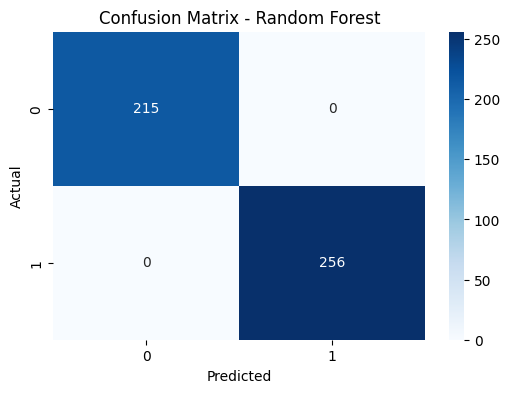


🔹 Training Decision Tree...

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       256

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



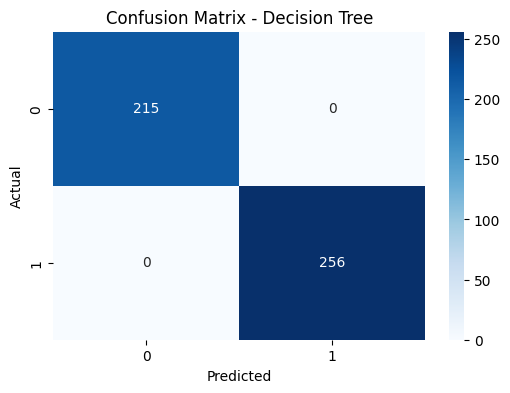


🔹 Training KNN...

Classification Report (KNN):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       256

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



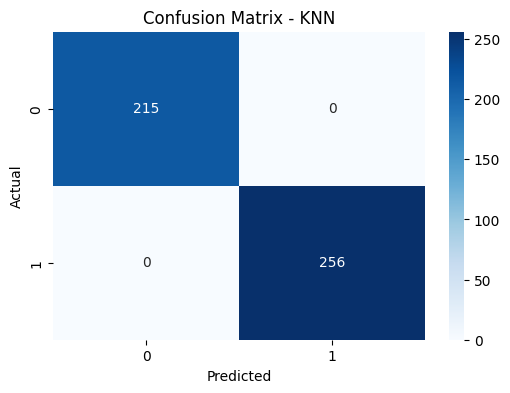


🔹 Training Naive Bayes...

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       215
           1       1.00      1.00      1.00       256

    accuracy                           1.00       471
   macro avg       1.00      1.00      1.00       471
weighted avg       1.00      1.00      1.00       471



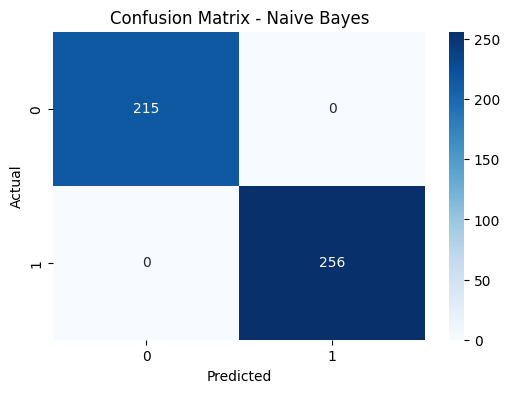


📊 Perbandingan Model:
               Accuracy  Precision  Recall  F1-Score
Random Forest       1.0        1.0     1.0       1.0
Decision Tree       1.0        1.0     1.0       1.0
KNN                 1.0        1.0     1.0       1.0
Naive Bayes         1.0        1.0     1.0       1.0


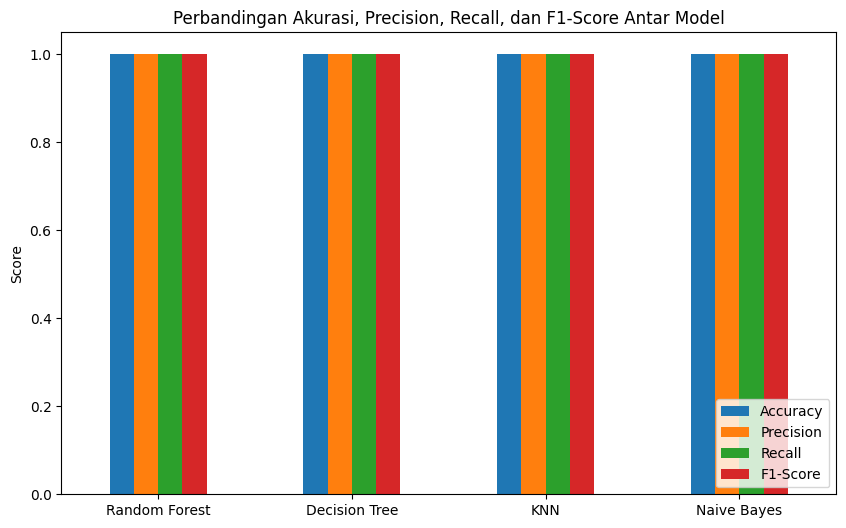

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
}

# Dictionary untuk simpan hasil evaluasi
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training pakai data yang sudah discaled
    model.fit(X_train_scaled, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    report = classification_report(y_test, y_pred, output_dict=True, zero_division=0)
    
    # Simpan hasil utama (macro avg agar balance antar kelas)
    results[name] = {
        "Accuracy": report["accuracy"],
        "Precision": report["macro avg"]["precision"],
        "Recall": report["macro avg"]["recall"],
        "F1-Score": report["macro avg"]["f1-score"]
    }
    
    # Tampilkan laporan lengkap
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred, zero_division=0))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Tampilkan perbandingan hasil dalam bentuk tabel
df_results = pd.DataFrame(results).T
print("\n📊 Perbandingan Model:")
print(df_results)

# Visualisasi perbandingan
df_results.plot(kind="bar", figsize=(10,6))
plt.title("Perbandingan Akurasi, Precision, Recall, dan F1-Score Antar Model")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.show()
